In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 로드
data = pd.read_csv('./dataset/diabetes.csv')

In [3]:
# 특성(X)과 타겟(y) 분리
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [4]:
# 데이터 전처리 : 특성 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [5]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [6]:
# 랜덤 포레스트 모델 생성 및 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
# 예측
y_pred = rf_model.predict(X_test)


In [8]:
# 교차 검증 수행
cv_scores = cross_val_score(rf_model, X_scaled, y, cv=5)

In [9]:
# 특성 중요도 계산
feature_importance = pd.DataFrame({
    '특성':X.columns,
    '중요도':rf_model.feature_importances_
}).sort_values('중요도', ascending=False)

In [10]:
# 결과 출력
print("모델 성능 평가:")
print("\n교차 검증 점수:")
print(f"평균 정확도: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
print("\n분류 리포트:")
print(classification_report(y_test, y_pred))

모델 성능 평가:

교차 검증 점수:
평균 정확도: 0.7657 (+/- 0.0715)

분류 리포트:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        99
           1       0.62      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



c:\aiproject2\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\aiproject2\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\aiproject2\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\aiproject2\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\aiproject2\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


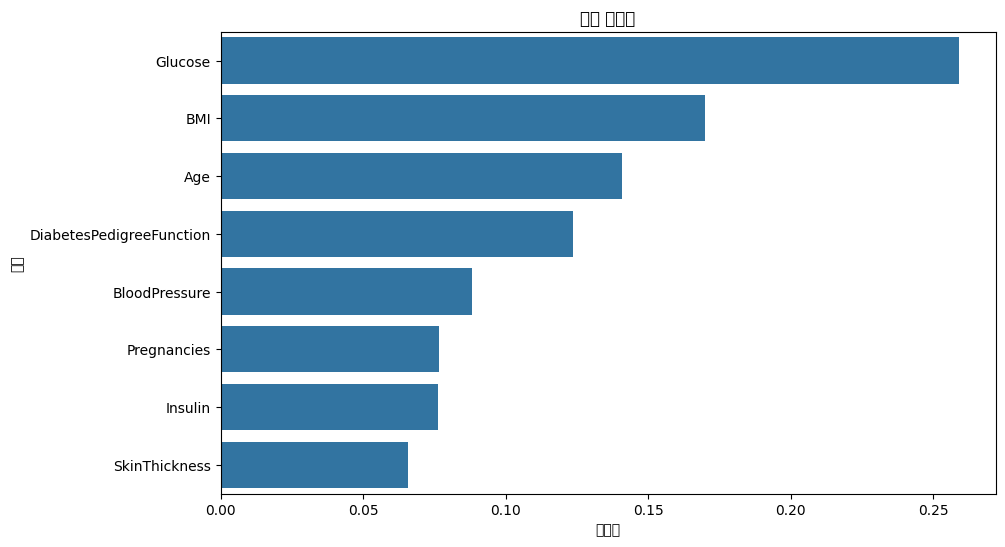

In [11]:
# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x="중요도", y="특성", data=feature_importance)
plt.title("특성 중요도")
plt.show()

c:\aiproject2\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\aiproject2\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\aiproject2\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\aiproject2\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54844 (\N{HANGUL SYLLABLE HON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\aiproject2\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\aiproject2\

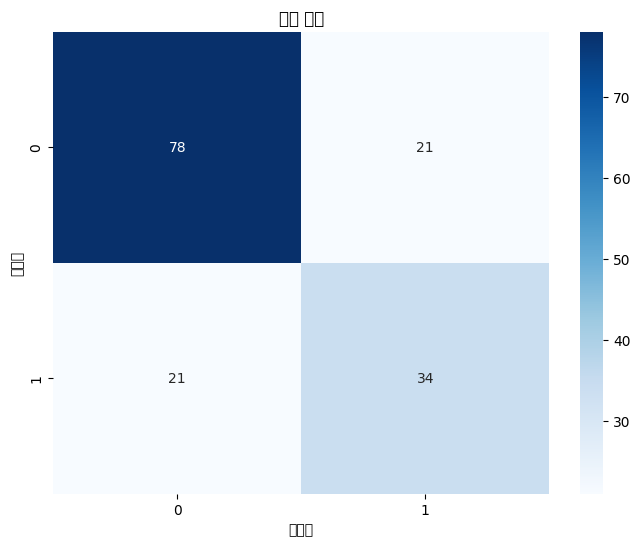

In [12]:
# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("혼동 행렬")
plt.xlabel("예측값")
plt.ylabel("실제값")
plt.show()

In [13]:
# 새로운 환자 데이터로 예측 예시
print("\n새로운 환자 데이터 예측 예시:")
# 임의의 환자 데이터 생성
new_patient = X_test.iloc[0:1]
prediction = rf_model.predict(new_patient)
prediction_prob = rf_model.predict_proba(new_patient)

print(f"예측 결과: {'당뇨병 환자' if prediction[0] == 1 else '정상'}")
print(f"당뇨병일 확률: {prediction_prob[0][1]:.2%}")


새로운 환자 데이터 예측 예시:
예측 결과: 정상
당뇨병일 확률: 31.00%


In [14]:
# 예측 신뢰도 분석
threshold_probs = rf_model.predict_proba(X_test)
confidence_scores = np.max(threshold_probs, axis=1)


예측 신뢰도 분포:


c:\aiproject2\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\aiproject2\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\aiproject2\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\aiproject2\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\aiproject2\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\aiproject2\.v

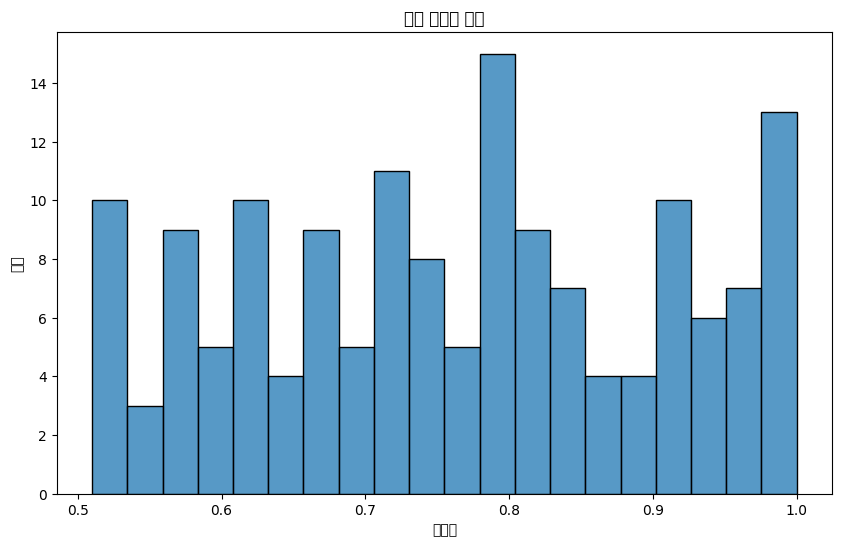

In [15]:
print("\n예측 신뢰도 분포:")
plt.figure(figsize=(10, 6))
sns.histplot(confidence_scores, bins=20)
plt.title("예측 신뢰도 분포")
plt.xlabel("신뢰도")
plt.ylabel("빈도")
plt.show()

In [16]:
# 보스톤 집 값 분석 예제

### 컬럼 설명 ###
# CRIM(타운별 1인당 범죄울), ZN(25,000평방피트 주택이 차지하는 비율), INDUS(비소매 상업지역 면적비율)
# CHAS(찰스강 인접 여부), NOX(일산화질소 농도), RM(주택 1가구당 평균 방 개수), AGE(1940년대 이전 주택 비율)
# DIS(보스턴 고용 센터까지의 가중거리), TAX(10,000달러당 재산세율), PTRATIO(타운별 학생교사 비율)
# B(타운별 흑인인구 비율 계산식), LSTAT(하위 계층의 비율), MEDV(주택의 중간 가격)

# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
# 폰트지정
plt.rcParams["font.family"] = "Malgun Gothic"

# 마이너스 부호 깨짐 지정
plt.rcParams["axes.unicode_minus"] = False

# 숫자가 지수표현식으로 나올 때 지정
pd.options.display.float_format = "{:.2f}".format

In [19]:
# 데이터 로드
data = pd.read_csv("dataset/HousingData.csv")

In [20]:
# 데이터 확인
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1,296,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2,242,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2,242,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3,222,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3,222,18.70,396.90,NaN,36.20


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [22]:
# 결측값 확인 및 처리
print(data.isnull().sum())

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [23]:
data = data.dropna()  # 결측값 제거

In [24]:
# 결측값 확인 및 처리
print(data.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [25]:
# 주요 변수 선택
X = data[
    ["CRIM", "RM", "TAX", "LSTAT"]
]  # 입력 변수: CRIM(범죄율), RM(방개수), TAX(세금), LSTAT(하위계층비율율)
y = data["MEDV"]  # 타겟 변수 (집값)

In [26]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [27]:
# 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
# 모델 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [29]:
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 41.01145441904804
R2 Score: 0.5137736507938266


In [30]:
# 회귀 계수 출력
print("회귀 계수:", model.coef_)
print("절편:", model.intercept_)

회귀 계수: [-0.08498347  5.59693339 -0.00824347 -0.42511164]
절편: -3.831014747888208


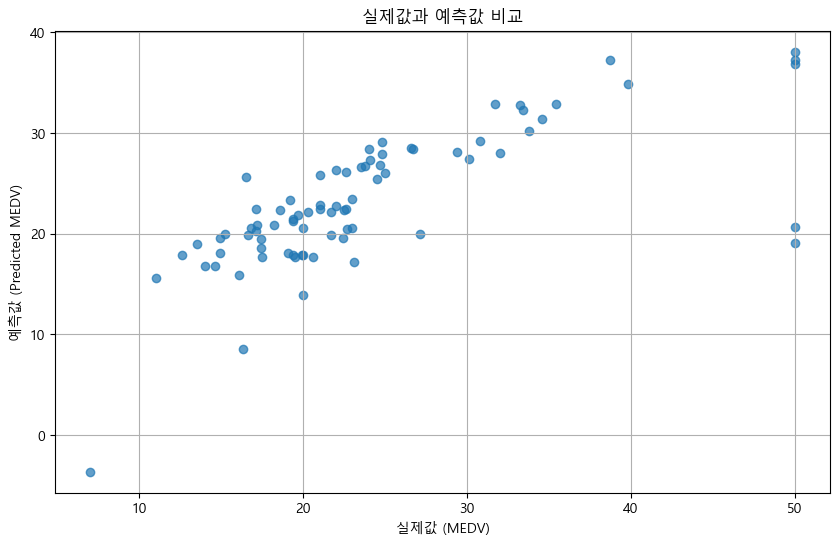

In [31]:
# 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("실제값 (MEDV)")
plt.ylabel("예측값 (Predicted MEDV)")
plt.title("실제값과 예측값 비교")
plt.grid()
plt.show()

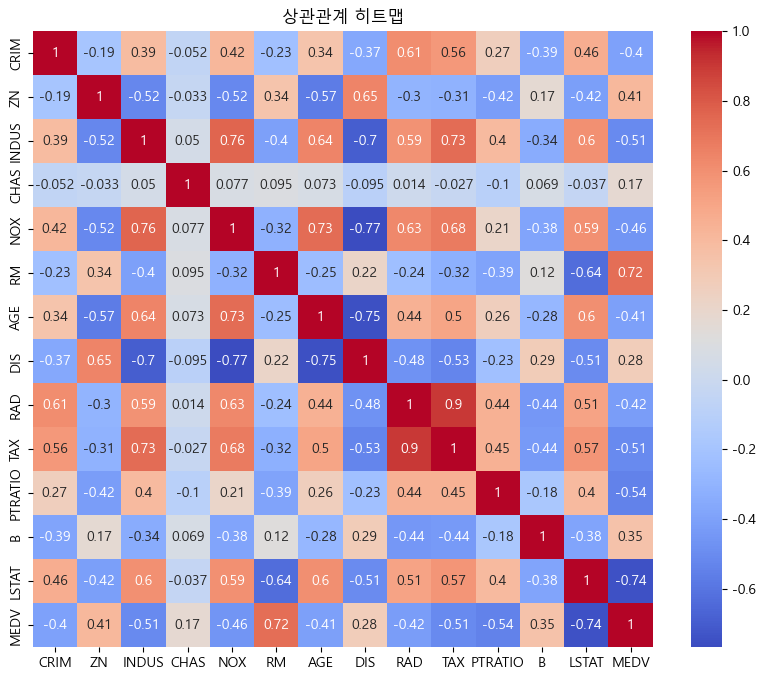

In [32]:
# 변수별 상관관계 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("상관관계 히트맵")
plt.show()

In [33]:
# 랜덤포레스트 모델 활용한 예제(cf. 다른 회귀모델 성능 비교)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [34]:
# 데이터 로드
data = pd.read_csv("dataset/HousingData.csv")

In [35]:
# 데이터 전처리
data = data.dropna() # 결측값 제거
X = data[['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'TAX', 'LSTAT']]
y = data['MEDV']

In [36]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# 1. 랜덤 포레스트 모델
rf_model = RandomForestRegressor(random_state=42, n_estimators=100) # n_estimators : 모델을 구성하는 결정 틀의 개수수
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

In [39]:
# 랜덤 포레스트 평가
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
print(f"랜덤 포레스트 - MSE: {rf_mse:.2f}, R2: {rf_r2:.2f}")

랜덤 포레스트 - MSE: 28.63, R2: 0.66


In [40]:
# 2. 다른 모델 비교
models = {
    "Linear Regression" : LinearRegression(),
    "Decision Tree" : DecisionTreeRegressor(random_state=42)
}

In [41]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2}
    print(f"{name} - MSE: {mse:.2f}, R2: {r2:.2f}")

Linear Regression - MSE: 36.34, R2: 0.57
Decision Tree - MSE: 27.30, R2: 0.68


In [42]:
# 3. 최적 모델 선택 및 시각화
results["Random Forest"] = {"MSE": rf_mse, "R2": rf_r2}
best_model = max(results, key=lambda x:results[x]['R2'])
print("\n최적 모델:", best_model)


최적 모델: Decision Tree


In [43]:
# 결과 시각화
r2_scores = [result["R2"] for result in results.values()]
model_names = list(results.keys())

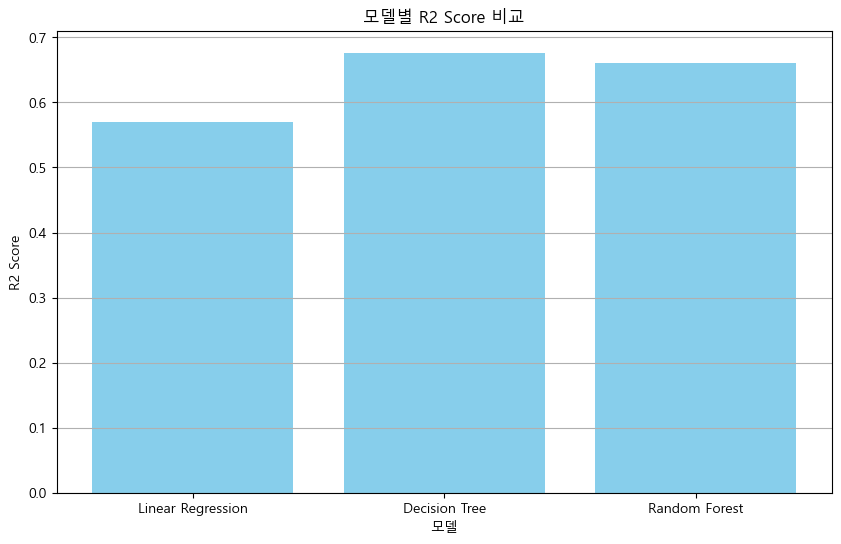

In [44]:
plt.figure(figsize=(10,6))
plt.bar(model_names, r2_scores, color='skyblue')
plt.xlabel("모델")
plt.ylabel("R2 Score")
plt.title("모델별 R2 Score 비교")
plt.grid(axis='y')
plt.show()

In [45]:
# 4. 랜덤 포레스트 하이퍼파라미터 튜닝 (옵션)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

In [46]:
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring="r2",
)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [47]:
print("\n최적 하이퍼파라미터:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_
tuned_rf_y_pred = best_rf_model.predict(X_test)


최적 하이퍼파라미터: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}


In [48]:
# 튜닝된 모델 평가
tuned_rf_mse = mean_squared_error(y_test, tuned_rf_y_pred)
tuned_rf_r2 = r2_score(y_test, tuned_rf_y_pred)
print(f"튜닝된 랜덤 포레스트 - MSE: {tuned_rf_mse:.2f}, R2: {tuned_rf_r2:.2f}")

튜닝된 랜덤 포레스트 - MSE: 28.63, R2: 0.66
